In [1]:
from matplotlib import pyplot as plt
import numpy as np
import torch
from torchvision import models, transforms
import shap
import os
from PIL import Image

args = {
    'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    'batch_size': 64,
    # 'test_batch_size': 1000,
    'epochs': 20,
    'lr': 1e-4
}

model_urls = {"resnet34":"https://download.pytorch.org/models/resnet34-b627a593.pth"}
model = models.resnet34(pretrained = True).to(args["device"])

print(model)

/home/users/lqa/miniconda3/envs/DataScience/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [9]:
# X, y = shap.datasets.imagenet50()

URLError: <urlopen error [Errno 111] Connection refused>

<class 'PIL.JpegImagePlugin.JpegImageFile'>
[[[0.60784316 0.53333336 0.4392157 ]
  [0.57254905 0.5254902  0.42352942]
  [0.57254905 0.5137255  0.4117647 ]
  ...
  [0.03921569 0.04313726 0.02352941]
  [0.07058824 0.06666667 0.04705882]
  [0.10196079 0.07843138 0.05490196]]

 [[0.6117647  0.5372549  0.45882353]
  [0.5882353  0.53333336 0.4392157 ]
  [0.5764706  0.5176471  0.42352942]
  ...
  [0.04313726 0.04705882 0.02745098]
  [0.07058824 0.0627451  0.04313726]
  [0.12156863 0.09803922 0.07450981]]

 [[0.6156863  0.54509807 0.46666667]
  [0.59607846 0.53333336 0.44705883]
  [0.5764706  0.52156866 0.42745098]
  ...
  [0.04313726 0.04313726 0.02745098]
  [0.08235294 0.07843138 0.05882353]
  [0.14117648 0.11764706 0.09411765]]

 ...

 [[0.8784314  0.81960785 0.68235296]
  [0.69803923 0.6313726  0.4745098 ]
  [0.5921569  0.49803922 0.38039216]
  ...
  [0.4627451  0.4117647  0.35686275]
  [0.44705883 0.3882353  0.34117648]
  [0.44705883 0.39607844 0.3372549 ]]

 [[0.94509804 0.88235295 0.792

.values =
array([[[[[-2.50311157e-07, -3.70353766e-07],
          [-2.50311157e-07, -3.70353766e-07],
          [-2.50311157e-07, -3.70353766e-07]],

         [[-2.50311157e-07, -3.70353766e-07],
          [-2.50311157e-07, -3.70353766e-07],
          [-2.50311157e-07, -3.70353766e-07]],

         [[-2.50311157e-07, -3.70353766e-07],
          [-2.50311157e-07, -3.70353766e-07],
          [-2.50311157e-07, -3.70353766e-07]],

         ...,

         [[-2.50311157e-07, -3.70353766e-07],
          [-2.50311157e-07, -3.70353766e-07],
          [-2.50311157e-07, -3.70353766e-07]],

         [[-2.50311157e-07, -3.70353766e-07],
          [-2.50311157e-07, -3.70353766e-07],
          [-2.50311157e-07, -3.70353766e-07]],

         [[-2.50311157e-07, -3.70353766e-07],
          [-2.50311157e-07, -3.70353766e-07],
          [-2.50311157e-07, -3.70353766e-07]]],


        [[[-2.50311157e-07, -3.70353766e-07],
          [-2.50311157e-07, -3.70353766e-07],
          [-2.50311157e-07, -3.70353766e-

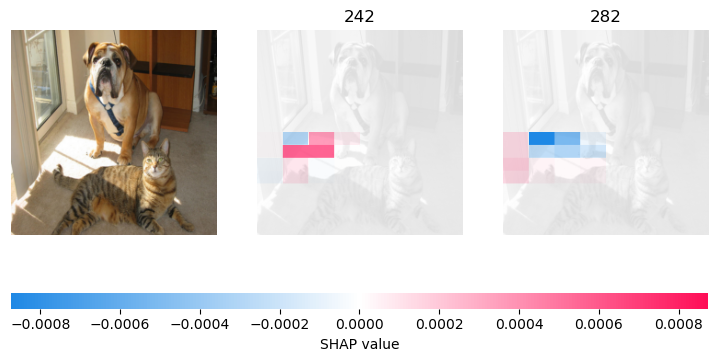

In [2]:
image = Image.open("./dataset/cat_dog.jpg")
print(type(image))

trans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
image = trans(image)

cat_dog = image.permute(1,2,0).numpy().astype(np.float32)
print(cat_dog)
print(cat_dog.shape)
# plt.imshow(cat_dog)
# plt.show()

model.eval()
# y_cat = torch.zeros(1000)
# y_cat[282] = 1

logits = model.forward(torch.from_numpy(cat_dog[np.newaxis, :]).permute(0,3,1,2).type(torch.float).to(args["device"])).cpu().detach().numpy().astype(np.float32)
pred = logits.argmax(axis=1)
print(pred)

masker = shap.maskers.Image("inpaint_telea", cat_dog.shape)

def f(x):
    return model.forward(torch.from_numpy(x).permute(0,3,1,2).type(torch.float).to(args["device"])).cpu().detach().numpy().astype(np.float32)
class_labels = list(range(0,1000)) 
explainer = shap.Explainer(f, masker, output_names=class_labels)

# shap_values = explainer((cat_dog)[np.newaxis, :], max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])
shap_values = explainer((cat_dog)[np.newaxis, :], max_evals=500, batch_size=50, outputs=[242,282])
print(shap_values)
# shap_values = [np.swapaxes(np.swapaxes(s, 2, 3), 1, -1) for s in shap_values]
shap.image_plot(shap_values, show=False)
# plt.savefig("./task3.5.png")



<class 'shap._explanation.Explanation'>
(1, 224, 224, 3, 2)


TypeError: Invalid shape (224, 3, 224) for image data

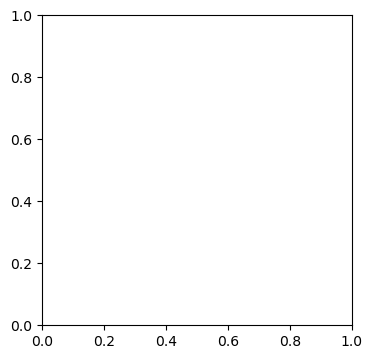

In [3]:
print(type(shap_values))
print(shap_values.values.shape)

# print(shap_values.values = (shap_values.values * 255).astype(np.uint8))
plt.matshow(shap_values.values.squeeze(axis=0)[:,:,:,0].transpose(1,2,0) * 255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


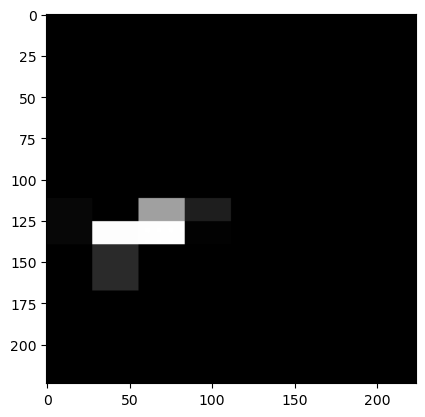

In [7]:
def visualize(shap_values):
    shap_value = shap_values.values.squeeze(0)[:,:,:,0] # label 242
    shap_value /= np.abs(shap_value).max()
    plt.imshow(shap_value, cmap="bwr")

visualize(shap_values)


In [24]:
logits = model.forward(torch.from_numpy(cat_dog[np.newaxis, :]).permute(0,3,1,2).type(torch.float).to(args["device"])).cpu().detach().numpy().astype(np.float32)
pred = logits.argmax(axis=1)
print(pred)

[497]


<class 'PIL.JpegImagePlugin.JpegImageFile'>


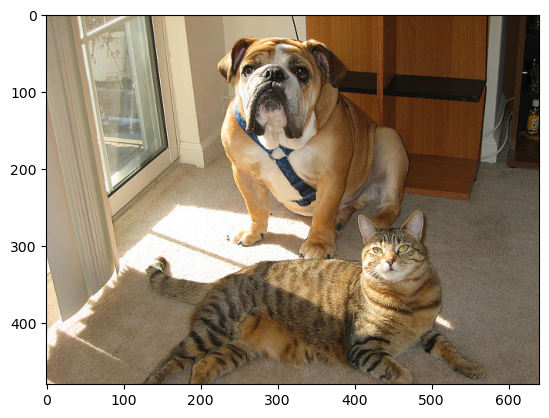

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


[array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]]]), array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0

In [2]:
# 这部分不太行
image = Image.open("./dataset/cat_dog.jpg")
print(type(image))
cat_dog = torch.from_numpy(np.array(image))
plt.imshow(cat_dog)
plt.show()

model.eval()
y_cat = torch.zeros(1000)
y_cat[282] = 1

logits = model.forward(cat_dog.permute([2,0,1]).unsqueeze(dim=0).type(torch.float).to(args["device"]))
pred = logits.max(dim=1, keepdim=True)

expl = shap.DeepExplainer(model, cat_dog.permute([2,0,1]).unsqueeze(dim=0).type(torch.float).to(args["device"]))
sv = expl.shap_values(cat_dog.permute([2,0,1]).unsqueeze(dim=0).type(torch.float).to(args["device"]))
print(sv)
# shap.image_plot(sv)


In [3]:
print(len(sv))
print(sv[0].shape[0])

1000
1


0.0


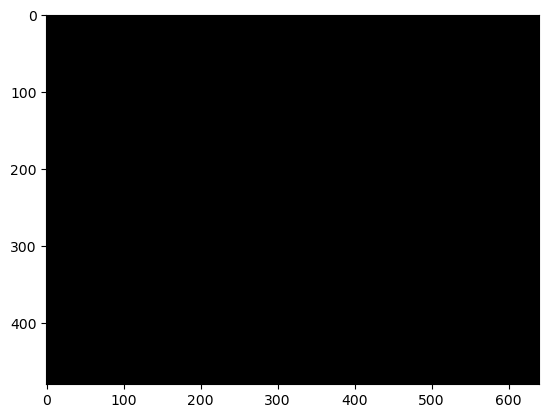

In [9]:
print(sv[0].sum())
plt.imshow(sv[0].squeeze(axis=0).transpose(1,2,0))

In [7]:
shap.image_plot(sv, np.array(image))

KeyboardInterrupt: 